In [1]:
import pynini
import pandas as pd
import os

In [2]:
from src.FST.transducers import *

In [5]:
fst = GrammarRuleTransducer()
sup_expr = GrammarRuleAcceptor("[var|num] ^ [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "[var|num] ^ { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")
sub_expr = GrammarRuleAcceptor("[var|num] _ [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "[var|num] _ { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")
fun = GrammarRuleAcceptor("[fun|var] de [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "[fun|var] ( [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* )")
fun2 = GrammarRuleAcceptor("[fun] [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "[fun] ( [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* )")
quant = GrammarRuleAcceptor("[qtf] [var] [set]", "[qtf] [var] \\in [set]")
it1 = GrammarRuleAcceptor("[\\sum|\\prod] pour [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* à [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* de",  "[\\sum|\\prod] \\limits _ { [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* } ^ { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")
it2 = GrammarRuleAcceptor("[\\sum|\\prod] pour [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* à [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "[\\sum|\\prod] \\limits _ { [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* } ^ { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")
it3 = GrammarRuleAcceptor("[\\sum|\\prod] de [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* à [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* de", "[\\sum|\\prod] \\limits _ { [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* } ^ { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")
it4 = GrammarRuleAcceptor("[\\sum|\\prod] de [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* à [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "[\\sum|\\prod] \\limits _ { [var] = [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* } ^ { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")
it5 = GrammarRuleAcceptor("[iter] pour [var|num|symb|set|rel]+ de",  "[iter] \\limits _ {  [var|num|symb|set|rel]+ }")
it6 = GrammarRuleAcceptor("[iter] pour [var] \\in [set]", "[iter] \\limits _ { [var] \\in [set] }")
it7 = GrammarRuleAcceptor("[iter] sur [set]", "[iter] _ { [set] }")
hat = GrammarRuleAcceptor("[var] \\hat", "\\hat { [var] }")
tild = GrammarRuleAcceptor("[var] \\tilde", "\\tilde { [var] }")
bar = GrammarRuleAcceptor("[uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* \\overline", "\\overline { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")
norm = GrammarRuleAcceptor("\\lVert de [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "\\lVert [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* \\lVert")
frac = GrammarRuleAcceptor("[uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* sur [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]*", "\\frac { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* } { [uop]? [[num|var]+] [[bop|[symb]+][[num|var]+]]* }")

[var|num]
[var|num]
^
^
{
{
[uop]?
[uop]?
[[num|var]+]
[[num|var]+]
[[bop|[symb]+][[num|var]+]]*
[[bop|[symb]+][[num|var]+]]*
[var|num]
[var|num]
_
_
{
{
[uop]?
[uop]?
[[num|var]+]
[[num|var]+]
[[bop|[symb]+][[num|var]+]]*
[[bop|[symb]+][[num|var]+]]*
[fun|var]
[fun|var]
(
(
[uop]?
[uop]?
[[num|var]+]
[[num|var]+]
[[bop|[symb]+][[num|var]+]]*
[[bop|[symb]+][[num|var]+]]*
[fun]
[fun]
(
(
[uop]?
[uop]?
[[num|var]+]
[[num|var]+]
[[bop|[symb]+][[num|var]+]]*
[[bop|[symb]+][[num|var]+]]*
[qtf]
[qtf]
[var]
[var]
\in
\in
[set]
[set]
[\sum|\prod]
[\sum|\prod]
\limits
\limits
_
_
{
{
[var]
[var]
=
=
[uop]?
[uop]?
[[num|var]+]
[[num|var]+]
[[bop|[symb]+][[num|var]+]]*
[[bop|[symb]+][[num|var]+]]*
}
}
^
^
{
{
[uop]?
[uop]?
[[num|var]+]
[[num|var]+]
[[bop|[symb]+][[num|var]+]]*
[[bop|[symb]+][[num|var]+]]*
[\sum|\prod]
[\sum|\prod]
\limits
\limits
_
_
{
{
[var]
[var]
=
=
[uop]?
[uop]?
[[num|var]+]
[[num|var]+]
[[bop|[symb]+][[num|var]+]]*
[[bop|[symb]+][[num|var]+]]*
}
}
^
^
{
{
[uop]?
[uop]?
[[nu

In [7]:
fst.add_grammar_rule(sub_expr)
fst.add_grammar_rule(sup_expr)
fst.add_grammar_rule(fun)
fst.add_grammar_rule(fun2)
fst.add_grammar_rule(quant)
fst.add_grammar_rule(it1)
fst.add_grammar_rule(it2)
fst.add_grammar_rule(it3)
fst.add_grammar_rule(it4)
fst.add_grammar_rule(it5)
fst.add_grammar_rule(it6)
fst.add_grammar_rule(it7)
fst.add_grammar_rule(hat)
fst.add_grammar_rule(tild)
fst.add_grammar_rule(bar)
fst.add_grammar_rule(norm)
fst.add_grammar_rule(frac)


In [9]:
t = '\\mathbb { P } _ x'
fst.predict(t, nbest=10)

['\\mathbb { P } _ { x }']

In [11]:
class GrammarTree():

    CLOSE_SYMBOLS = ['+', '*', '?']
    BIN_SYMBOLS = ['|', '.', '-']

    def __init__(self, father, num_child):
        
        self.childs = []
        self.ops = []
        self.close = None
        self.father = father 
        self.num_child = num_child

    def __str__(self):
        res = '['
        for i,  child in enumerate(self.childs) :
            if type(child) == GrammarTree : res += child.__str__()
            else : res += child
            if i < len(self.childs) - 1 : res += self.ops[i]
        res += ']'
        if self.close != None : res += self.close 
        return res

    def num_childs(self):
        return len(self.childs)
    
    def child(self, i) :
        return self.childs[i]

    @staticmethod
    def read_structure(grammar_structure:str):
        str_input = grammar_structure.replace(" ","")
        str_input = str_input.replace('][', '].[')
        for s in GrammarTree.CLOSE_SYMBOLS : 
            str_input = str_input.replace(s + '[', s + '.[')
        for s in ['[', ']'] + GrammarTree.CLOSE_SYMBOLS + GrammarTree.BIN_SYMBOLS :
            str_input = str_input.replace(s, " " + s + " ")
        
        str_input = str_input.split()

        pos = GrammarTree(None, None)

        for i, symbol in enumerate(str_input) : 

            if symbol == '[' : 
                pos.childs.append(GrammarTree(pos, len(pos.childs))) 
                pos = pos.childs[-1]
            elif symbol == ']':
                if i != len(str_input) - 1 and str_input[i+1] in GrammarTree.CLOSE_SYMBOLS :
                    pos.close = str_input[i+1]
                if pos.father == None : 
                    raise Exception(ValueError(f"Invalid grammar structure : {str_input}"))
                pos = pos.father
            elif i > 0 and symbol in GrammarTree.CLOSE_SYMBOLS and str_input[i-1] == ']': 
                pass
            elif symbol in GrammarTree.BIN_SYMBOLS :
                pos.ops.append(symbol)
            elif symbol in GRAMMAR_ACC.keys() or symbol in dict(Sig_tex).values() :
                print(symbol)
                pos.childs.append(symbol)
            else : 
                raise Exception(ValueError(f"Invalid symbol : {symbol}"))
        return pos
    
    def get_fst(self):
        res = pynini.accep(NULL_TOKEN, token_type=Sig_tex)
        if len(self.childs) > 0 :
            child = self.childs[0] 
            if type(child) == GrammarTree : res = child.get_fst()
            else : 
                if child in GRAMMAR_ACC.keys(): 
                    res = GRAMMAR_ACC[child].copy()
                elif child in dict(Sig_tex).values() :res = pynini.accep(child, token_type=Sig_tex)
            for i, child in enumerate(self.childs[1:]) : 
                if type(child) == GrammarTree : sub_fst = child.get_fst()
                else : 
                    if child in GRAMMAR_ACC.keys(): sub_fst = GRAMMAR_ACC[child]
                    elif child in dict(Sig_tex).values() :sub_fst = pynini.accep(child, token_type=Sig_tex)
                if self.ops[i] == '.' : res = pynini.concat(res, sub_fst)
                elif self.ops[i] == '|' : res = pynini.union(res, sub_fst)
                elif self.ops[i] == '-' : res = pynini.difference(res, sub_fst)
        if self.close == '*': return res.star.optimize()
        elif self.close == '+':
            return res.plus.optimize()
        elif self.close == '?': return res.ques.optimize()
        return res.optimize()



In [7]:
structure = "[uop]? [[num|var]+] [[bop][[num|var]+]]*"

struct = GrammarTree.read_structure(structure)

print(struct)

[[uop]?.[[num|var]+].[[bop].[[num|var]+]]*]


In [7]:
def accep(input_string:str):
        symbols = input_string.split()
        acc = pynini.accep(NULL_TOKEN, token_type=Sig_tex)
        for s in symbols : 
            acc = pynini.concat(acc, pynini.accep(s, token_type = Sig_tex))
        return acc.optimize()

In [35]:
[1][1:]

[]

In [17]:
fst = FullTransducer()

[var|num]
[var|num]
^
^
{
{
[uop]?
[uop]?
[[num|var|infty]+]
[[num|var|infty]+]
[[bop|[symb]+][[num|var|infty]+]]*
[[bop|[symb]+][[num|var|infty]+]]*
[var|num]
[var|num]
_
_
{
{
[uop]?
[uop]?
[[num|var|infty]+]
[[num|var|infty]+]
[[bop|[symb]+][[num|var|infty]+]]*
[[bop|[symb]+][[num|var|infty]+]]*
[fun|var]
[fun|var]
(
(
[uop]?
[uop]?
[[num|var|infty]+]
[[num|var|infty]+]
[[bop|[symb]+][[num|var|infty]+]]*
[[bop|[symb]+][[num|var|infty]+]]*
[fun]
[fun]
(
(
[uop]?
[uop]?
[[num|var|infty]+]
[[num|var|infty]+]
[[bop|[symb]+][[num|var|infty]+]]*
[[bop|[symb]+][[num|var|infty]+]]*
[qtf]
[qtf]
[var]
[var]
\in
\in
[set]
[set]
[\sum|\prod]
[\sum|\prod]
\limits
\limits
_
_
{
{
[var]
[var]
=
=
[uop]?
[uop]?
[[num|var|infty]+]
[[num|var|infty]+]
[[bop|[symb]+][[num|var|infty]+]]*
[[bop|[symb]+][[num|var|infty]+]]*
}
}
^
^
{
{
[uop]?
[uop]?
[[num|var|infty]+]
[[num|var|infty]+]
[[bop|[symb]+][[num|var|infty]+]]*
[[bop|[symb]+][[num|var|infty]+]]*
[\sum|\prod]
[\sum|\prod]
\limits
\limits
_
_
{
{


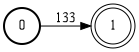

In [19]:
pynini.accep("\\in", token_type=Sig_tex)

In [21]:
fst.predict("la somme pour i allant de un à grand n moins s moins deux de u indice i alpha indice p")

'\\sum \\limits _ { i = 1 } ^ { N - s - 2 } u _ { i } \\alpha _ { p }'

In [7]:
fst = LexGraMultiLayerFST()

chapeau
tilde
vecteur
^
_
barre
de
:
pour
=
à
de
pour
=
à
de
=
à
de
de
=
à
pour
allant_de
à
de
pour
allant_de
à
de
allant_de
à
de
de
allant_de
à
\int
de
à
de
\int
allant_de
à
de
pour
de
pour
\in
sur


In [5]:
l1 = GrammarRuleAcceptor("[num]", "{ [num] }")

In [7]:
l2 = GrammarRuleAcceptor("{ [num] }", "{ { [num] } }")

{
}


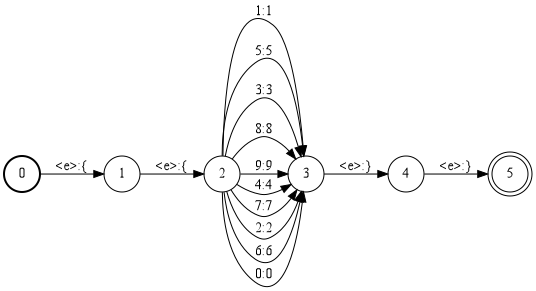

In [9]:
l1.get_fst() @ l2.get_fst()

In [5]:
def accep(input_string:str):
    symbols = input_string.split()
    acc = pynini.accep(NULL_TOKEN, token_type=Sig_tex)
    for s in symbols : 
        acc = pynini.concat(acc, pynini.accep(s, token_type = Sig_tex))
    return acc.optimize()


g1 = GrammarRuleTransducer()
g1.add_grammar_rule(l1)

g2 = GrammarRuleTransducer()
g2.add_grammar_rule(l2)

NameError: name 'l1' is not defined

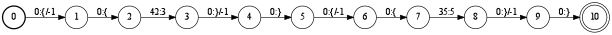

In [29]:
accep('3 5') @ g1.get_fst() @ g2.get_fst()

In [11]:
fst = LexGraMultiLayerFST()

chapeau
tilde
vecteur
^
_
barre
de
:
pour
=
à
de
pour
=
à
de
=
à
de
de
=
à
pour
allant_de
à
de
pour
allant_de
à
de
allant_de
à
de
de
allant_de
à
\int
de
à
de
\int
allant_de
à
de
pour
de
pour
\in
sur


In [13]:
fst.outputs("x puissance 3 vecteur alpha")

['{ x ^ { 3 } } \\vec { \\alpha }', '{ x ^ { 3 \\vec { \\alpha } } }']

In [31]:
accep('{ f ( { u _ { i } } ) }') @ fst.grammar['funexpr']